<a href="https://colab.research.google.com/github/TeraneAgaeva/Analysis-of-Micromobile-Taxi-Service-Operation-in-India_python/blob/main/Analysis_of_Micromobile_Taxi_Service_Operation_in_India_python_UKR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Опис бізнес задачі та набору даних

Набір даних "Yulu" містить інформацію про попит на спільні електровелосипеди в Індії, що надаються провідним індійським постачальником мікромобільності Yulu. Ця компанія пропонує унікальні транспортні засоби для щоденних поїздок з метою усунення транспортних заторів в Індії та забезпечення безпечного, зручного та доступного рішення для пересування. Зони Yulu розташовані в оптимальних місцях, включаючи станції метро, автобусні зупинки, офісні простори, житлові райони та корпоративні офіси, щоб полегшити поїздки на перші та останні кілометри.

Останнім часом Yulu зіткнулася зі значними зниженнями доходів, тому компанія звернулася до консалтингової фірми з метою зрозуміти, від яких факторів залежить попит на ці спільні електровелосипеди, особливо на індійському ринку.

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів


0. Завантажуємо всі бібліотеки, які необхідля для роботи з даними:


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt # or  import matplotlib.pyplot as plt
%matplotlib inline

Підключаємо гугл-диск:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Завантажуємо дані з файла `yulu_rental.csv` у pandas.DataFrame `df`.**

In [3]:
!ls drive/MyDrive/yulu_rental.csv

drive/MyDrive/yulu_rental.csv


Пропишемо шлях до файла [yulu_rental.csv](https://drive.google.com/file/d/1f3zTW-hRHo1DQrtjjxsA2yTErjQNSvb5/view?usp=sharing):

In [4]:
data_path = 'drive/MyDrive/yulu_rental.csv'
df = pd.read_csv(data_path)

**2. Проведемо первинний аналіз даних:**

Розглянемо структуру таблиці, вивівши перші 3 записи з набору даних:


In [5]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


Проаналізуємо типи даних в наборі даних:


In [6]:
df.dtypes # 1st variant

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [7]:
df.info()  # 2nd variant

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Подивимось на розміри набору даних:

In [8]:
df_shape = df.shape  # розмір датасету
df_shape

(10886, 12)

In [9]:
print(f'Набір містить {df.shape[0]} та {df.shape[1]} колонок.')

Набір містить 10886 та 12 колонок.


Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі.
Наша колонка тепер стане таймстемпом і для неї став доступний функціонал, описаний тут

https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html

Наприклад, ми можемо легко виокремити дату, день тижня, чи це робочий день, чи ні.

In [10]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку dayofweek для того, аби дослідити детальніше, коли у нас немає поїздок.

In [11]:
df['dayofweek'] = df.datetime.dt.day_of_week

In [12]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,5


Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [13]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


**3. АНАЛІЗ БІЗНЕСУ**

1. З допомогою matplotlib побудуємо найпростіший лінійний графік кількості зареєстрованих користувачів (`registered`) на кожну годину.

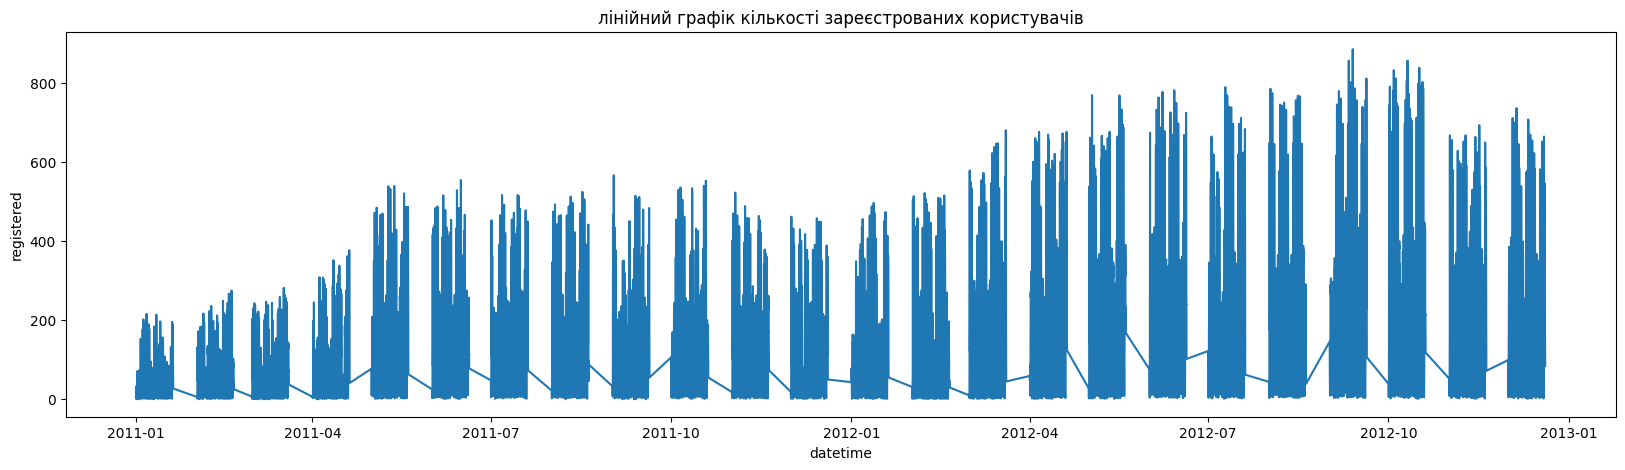

In [14]:
plt.figure(figsize=(20, 5))  # створюємо фігуру
x = df['datetime']
y = df['registered']

plt.plot(x,y)
plt.title("лінійний графік кількості зареєстрованих користувачів")
plt.xlabel("datetime")
plt.ylabel("registered");

Графік не дуже зручний для аналізу. Спробуємо загрегувати дані по дням. Для цього створимио колонку "дата" (без часу) і після цього загрегуємо дані для отримання кількість зарестрованих клієнтів на день.

In [15]:
df['date'] = df.datetime.dt.date

In [16]:
df_registered_by_date = df.groupby('date')['registered'].sum().reset_index()
print(df_registered_by_date)


           date  registered
0    2011-01-01         654
1    2011-01-02         670
2    2011-01-03        1229
3    2011-01-04        1454
4    2011-01-05        1518
..          ...         ...
451  2012-12-15        4280
452  2012-12-16        3248
453  2012-12-17        4373
454  2012-12-18        5124
455  2012-12-19        4934

[456 rows x 2 columns]


2. Тепер побудуємо лінійний графік з matplotlib для даних в `df_registered_by_date`.

  Додамо наступну частину до графіку аби зробити підписи за віссю ОХ більш читаємими

  `plt.xticks(rotation=45, ha='right')`

  Після побудови графіку проаналізуємо, які тенденції щодо зміни кількості зареєстрованих користувачів в часі бачимо і чому так може бути?

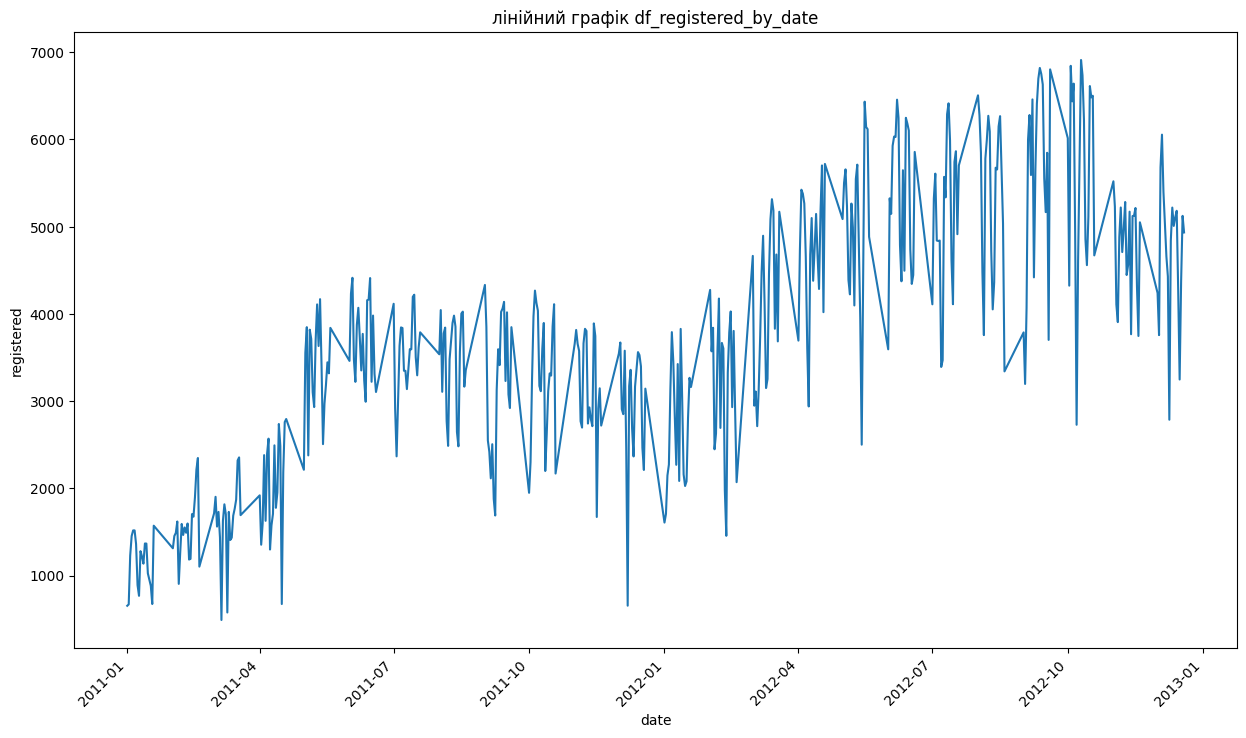

In [17]:
plt.figure(figsize=(15, 8))  # створюємо фігуру
x = df_registered_by_date['date']
y = df_registered_by_date['registered']
plt.plot(x,y)
plt.xticks(rotation=45, ha='right')
plt.title("лінійний графік df_registered_by_date")
plt.xlabel("date")
plt.ylabel("registered");



Висновок 2: З графіку ми бачимо, що у загальному кількість зареєстрованиих користувачів зростала з роками, але з 2012-10 йде поступовий спад. Але залежно від часу та дня кількість зареєстрованих користувачів то більше то меньше - треба додатково аналізувати дані.

3. Побудуємо графік розсіювання (scatterplot) між температурою і тим, як вона відчувається (atemp).  Які висновки можна зробити?

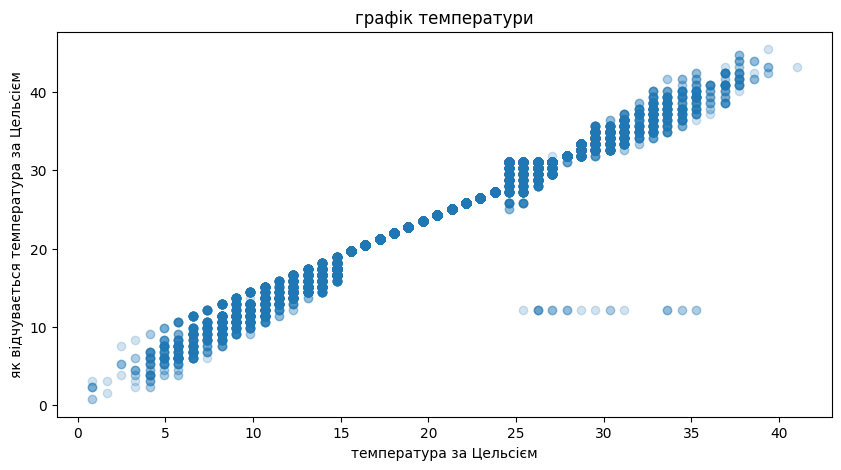

In [18]:
plt.figure(figsize=(10, 5))  # створюємо фігуру
x = df['temp']
y = df['atemp']
plt.scatter(x, y, alpha=0.2)
plt.title("графік температури")
plt.xlabel("температура за Цельсієм")
plt.ylabel("як відчувається температура за Цельсієм");

Висновок 3:якщо температура 15 градусів то може відчуватись як від 14-18, а якщо температура 16 то може відчуватись тільки як 19 градусів - аналогічно лише по одному значенню для 17-24. Якщо аналізувати діапазони до 15 градусів та після 24 то чим вища чи нижча температура тим більший діапазон як вона відчувається. Прогноз погоди добре враховувати при наданні послуг таксі.

4. Побудуємо гістограму для кількості користувачів, задамо кількість бінів рівну 30 і задамо прозорість 0.5. Додамо підписи за осями ОХ і ОУ, а також назву дівграмі. Проаналізуємо розмподіл даних.

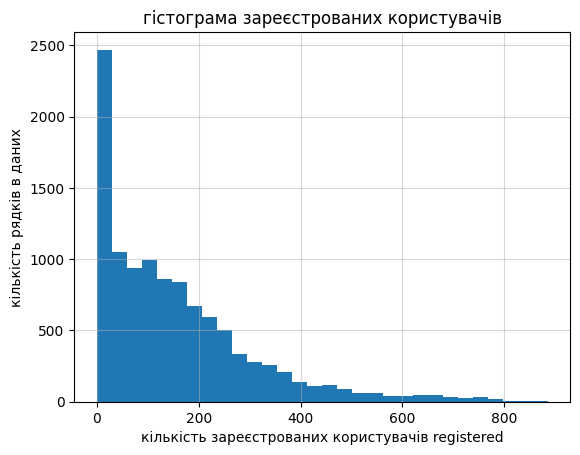

In [19]:
plt.hist(df.registered, bins=30)
plt.grid(axis='both', alpha=.5)
plt.title("гістограма зареєстрованих користувачів")
plt.xlabel("кількість зареєстрованих користувачів registered")
plt.ylabel("кількість рядків в даних");

Висновок 4: Сильно скошений розподіл:Більшість зареєстрованих користувачів мають невелику кількість даних (розташовано близько нуля). Це можна спостерігати з високого піку зліва. У той же час, у міру збільшення кількості зареєстрованих користувачів частота різко падає, що говорить про невелику кількість користувачів з великою кількістю даних.

Спостерігається асиметрія: Гістограма показує сильну праву асиметрію (більшість даних зосереджена зліва), що може означати, що більшість користувачів реєструється, але активність чи залучення відносно низька.

Наявність поодиноких випадків: Незважаючи на наявність користувачів з великою кількістю реєстрацій, їхня кількість значно менша, що відображається невеликими стовпцями праворуч.

Можливі причини такого розподілу:
Такий розподіл може свідчити про те, що сервіс приваблює багато нових користувачів, але лише невелика частина їх активно використовує його. Це може бути пов'язане з сезонністю, специфічними подіями чи маркетинговими кампаніями, які залучають користувачів на короткий термін.

Додатково, можна було б вивчити поведінку користувачів, щоб зрозуміти, чому багато хто реєструється, але не проявляє активності. Для детальнішого аналізу варто додатково розглянути інші показники, такі як активність користувачів або їх життєвий цикл.

5.Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього:1) виберемо з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуємо ці записи за днями тижня (dayofweek) та обчислимо кількість нульових записів для кожного дня.
2)Після групування, використаємо графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

In [20]:
filtered_registered = df[df['registered'] == 0]

In [21]:
df_registered_by_dayofweek = filtered_registered.groupby('dayofweek').registered.count().reset_index()
df_registered_by_dayofweek

,dayofweek,registered
0,0,5
1,1,3
2,2,2
3,3,1
4,4,1
5,5,1
6,6,2


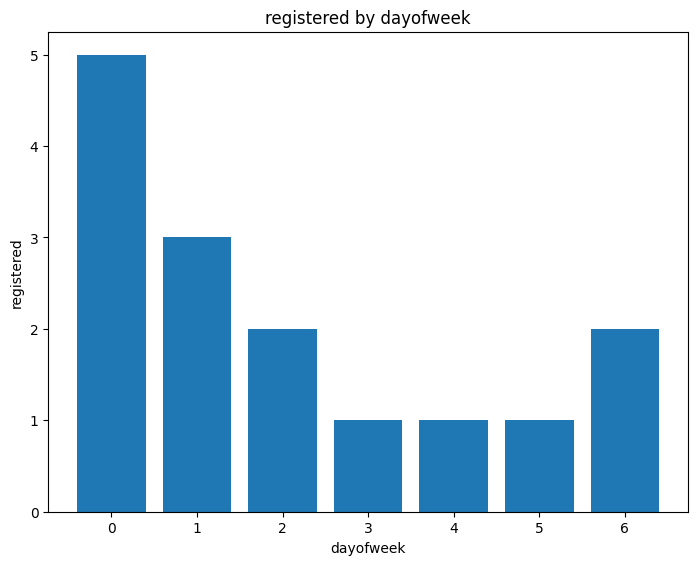

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_registered_by_dayofweek['dayofweek'], df_registered_by_dayofweek['registered'])
plt.title("registered by dayofweek")
plt.xlabel("dayofweek")
plt.ylabel("registered")
plt.show()

Висновок 5: На цьому графіку відображається кількість нульових активностей зареєстрованих користувачів по днях тижня (тобто випадки, коли не було зареєстровано жодної подорожі).

Найбільша кількість нульових активностей припадає на перший день тижня (індекс 0):

Це може означати, що користувачі рідше орендують велосипеди в цей день або типовий вихідний, коли використання велосипедів мінімально.
Поступове зменшення нульових активностей з першого до другого дня тижня:

Починаючи з індексу 1 і далі, спостерігається зниження нульової активності, що може вказувати на зростання попиту на оренду велосипедів у міру початку робочого тижня.
Мінімальна активність припадає на середину тижня (індекси 3, 4, 5):

У середу, четвер та п'ятницю нульових активностей значно менше, що свідчить про те, що в ці дні користувачі активніше орендують велосипеди, можливо через робочий графік.
Підвищення нульових активностей до останнього дня тижня (індекс 6):

В останній день тижня знову спостерігається зростання нульових активностей. Це може говорити про те, що користувачі менше користуються велосипедами в цей день, можливо, через відпочинок або інші заняття у вихідні дні.

Коли аналізуємо нульові активності, стає ясно, що графік відображає періоди, коли велосипеди зовсім не орендували. Це важливо для розуміння тенденцій попиту, оскільки високий показник нульової активності може бути сигналом для того, щоб переглянути стратегії стимулювання використання сервісу в ті чи інші дні тижня.

6. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами. Згрупуємо всі дані за погодними умовами і визначимо суму кількості зареєстрованих користувачів для кожної погодньої умови. Побудуємо стовпачасту діаграму, яка відобразить результат обчислень. Проаналізуємо чи побудована візуалізація має логічний сенс з точки зору опису даних.

In [23]:
df_weather = df.groupby('weather').registered.count().reset_index()
df_weather

,weather,registered
0,1,7192
1,2,2834
2,3,859
3,4,1


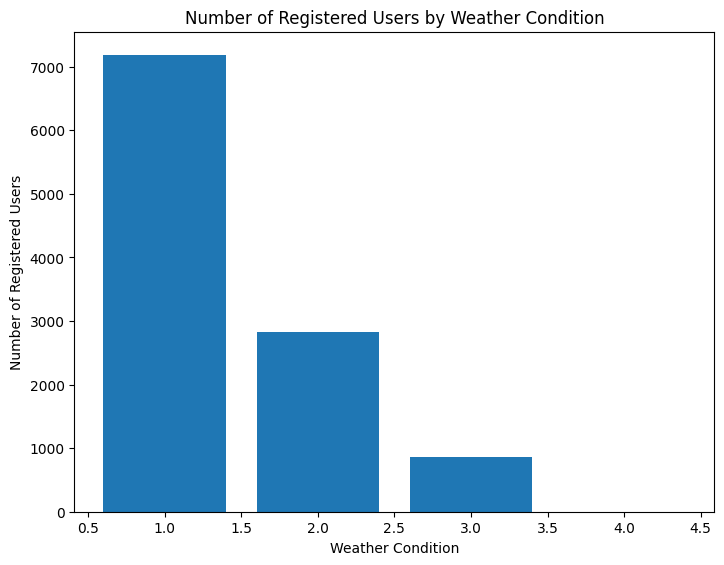

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# Стваорення стовпчатої діаграми

ax.bar(df_weather.weather, df_weather.registered)

# Додавання підпису осі X
ax.set_xlabel('Weather Condition')

# Додавання підпису осі Y
ax.set_ylabel('Number of Registered Users')

# Додавання назви діаграми
ax.set_title('Number of Registered Users by Weather Condition')
plt.show()

Висновок 6: Діаграма відображає те, що чим краща погода, тим більше зареєстрованих користувачів, що є логічним, адже в хорошу погоду зручно користуватись мікромобільним транспортом.

7.Користуючись групою методів pandas.plot побудуємо діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановимо прозорість на 0.5, а також налаштуйємо діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (atemp).

In [25]:
df_weather = df.groupby('humidity').registered.count().reset_index()
df_weather

,humidity,registered
0,0,22
1,8,1
2,10,1
3,12,1
4,13,1
...,...,...
84,93,205
85,94,324
86,96,1
87,97,1


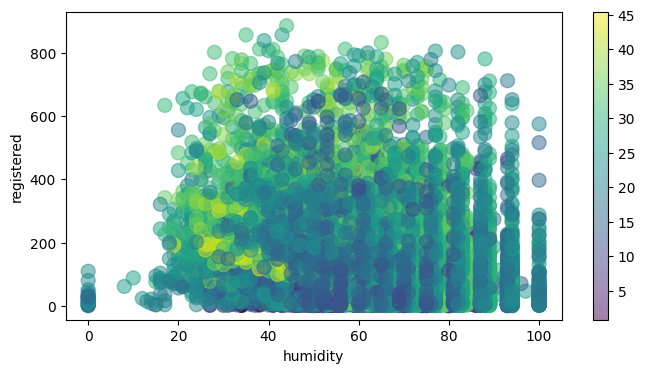

In [26]:
col_x = 'humidity'
col_y = 'registered'
color_feature = 'atemp'

plt.figure(figsize=(8,4))
plt.scatter(df[col_x], df[col_y], alpha=0.5,
            s=100, c=df[color_feature])
plt.xlabel(col_x)
plt.ylabel(col_y)
# додавання шкали кольору
plt.colorbar();

Висновок 7: Діаграмма розсіювання показує, що вологість не дуже сильно впливає на зареєстрованих користувачів, адже в діапазоні вологості від 25 до 85 кількість зареєстрованих користувачів близько 550. За цими діапазонами кількість користувачів зменьшується, особливо при вологості до 20 - взагалі може бути нульова активність. В діапазоні від 80 до 100 йде поступове зниження користувачів.

8. Користуючись методом seaborn.jointplot побудуємо візуалізацію графіка розсіювання між змінними humidity та count, зазначивши колір точки в відповідності до значення змінної weather.Спробуємо дослідити чи є вплив та користь такого аналізу:

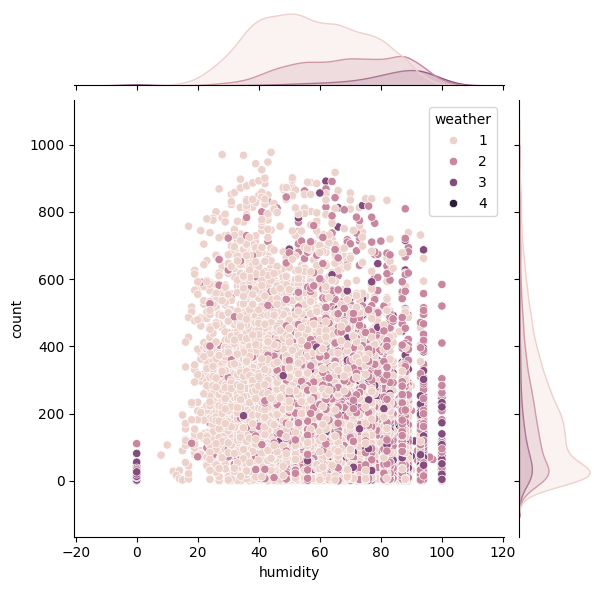

In [27]:
sns.jointplot(data=df, x="humidity", y="count", hue="weather");

Висновок 8: З візуалізації бачимо безпосередній вплив погоди на загальну кількість користувачів (зареєстрованих та не зареєстрованих). Кількість користувачів в хорошу погоду не становить меньше 600 користувачів, а з погіршенням погоди плавно знижується до 250 користувачів.

9. Відфільтруємо і збережемо в окремій змінній лише дані з сезоном "весна" і "літо". Користуючись методом seaborn.jointplot побудуйємо візуалізацію графіка розсіювання між змінними casual та registered, зазначивши колір точки в відповідності до значення змінної season. Встановимо прозорість на 0.2.
Опишемо свої спостереження з графіку.

Фильтрація данных по сезонам весна (1) и літо (2)

In [28]:
filtered_df = df.loc[df['season'].isin([1, 2])]

Виведемо декілька рядків для перевірки:

In [29]:
print(filtered_df.head())

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  dayofweek        date  
0        81        0.0       3          13     16          5  2011-01-01  
1        80        0.0       8          32     40          5  2011-01-01  
2        80        0.0       5          27     32          5  2011-01-01  
3        75        0.0       3          10     13          5  2011-01-01  
4        75        0.0       0           1      1          5  2011-01-01  


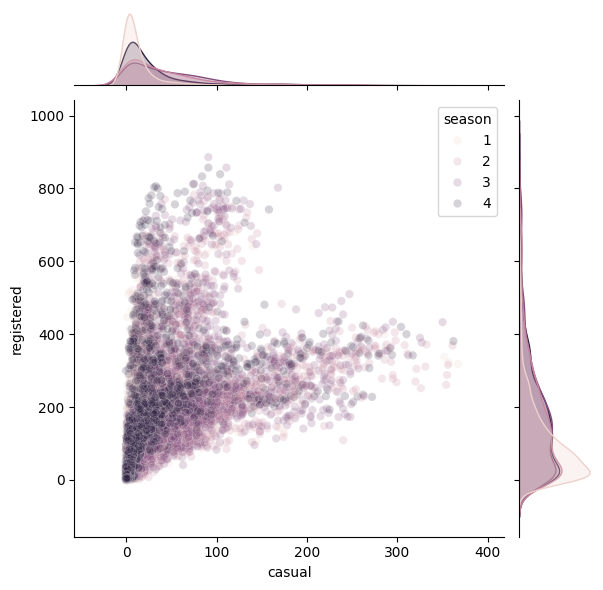

In [30]:
sns.jointplot(data=df, x="casual", y="registered", alpha=0.2, hue="season");

Висновок 9: В холодну пору року більше зареєстрованих користувачів ніж незареєстрованиих користуються послугами мікромобільного таксі. В хорошу погоду більше не зареєстрованих користувачів. Скоріше за все зареєстровані користувачі частіше використовують транспорт для поїздок на роботу, наприклад чи інших регулярних подій, погода на які має не досить великий вплив. Тож можна подумати над ціновою політикою як заохотити більше незареєстрованих користувачів використовувати наше таксі, можливо дослідити конкурентів і порівняти цінові політики чи додати якусь приємність - наприклад пляшку води, при цьому трохи підвищити ціну. Для зареєстрованих користувачів є сенс ввести абоненську плату наприклад і нараховувати бонуси за лояльність, що теж позитивно може вплинути на реєстрацію нових користувачів.

10. Для дослідження як розподілу значень humidity в залежності від погоди (weather) побудуємо візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:
https://seaborn.pydata.org/generated/seaborn.boxplot.html

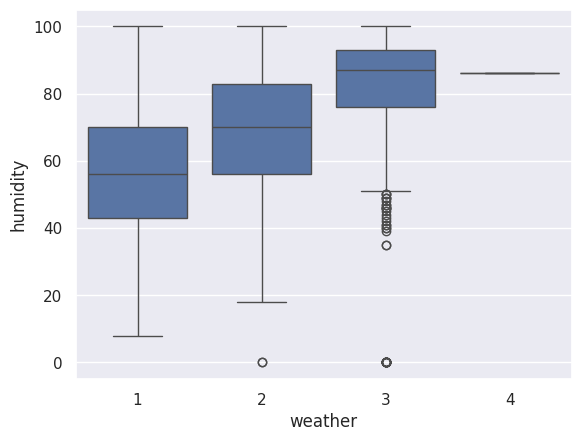

In [31]:
sns.set_theme()
sns.boxplot(data=df, x="weather", y="humidity",);


Висновок 10: На графіку бачимо, що вища вологість супроводжується погіршенням погоди, бувають виключення, але не часто. Для планування бюджету потрібно враховувати сезонність та особливості погоди в ці сезони.

11. Використаємо бібліотеку Seaborn для створення парних графіків (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.
Для побудови цієї візуалізації спочатку відфільтруємо потрібні колонки в даних і потім зробимо візуалізацію.

Проаналізуємо візуалізацію для дослідження поведінку користувачів у святкові дні.

In [32]:
filtered_df = df[['registered', 'casual', 'count', 'workingday']]
filtered_df

,registered,casual,count,workingday
0,13,3,16,0
1,32,8,40,0
2,27,5,32,0
3,10,3,13,0
4,1,0,1,0
...,...,...,...,...
10881,329,7,336,1
10882,231,10,241,1
10883,164,4,168,1
10884,117,12,129,1


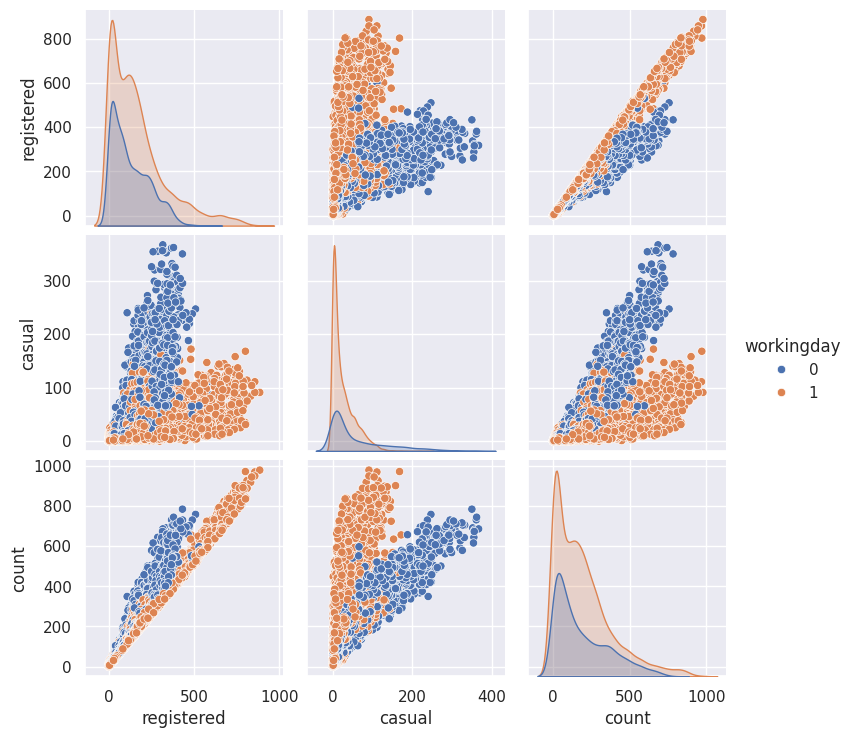

In [33]:
sns.pairplot(filtered_df, hue='workingday');

Висновок 11: Як вже визачали раніше, дана візуалізація також демонстру, що в вихідний день послугами мікромобільного таксі користуються більше не зареєстровані користувачі, а у будній більше зареєстровані користувачі, що є логічним. Додатково можно провести аналіз лояльності постійних користувачів серед зареєстрованих та додатково їх відзначити бонусами, наприклад додаткова безкоштовна поїздка на місяць. Це може також вплинути на прихід нових зареєстрованих користувачів.

12. Давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього створимо нову змінну df_viz яка містить лише колонки 'date', 'registered', 'casual', згрупуємо дані за датою і відобразимо на одному графіку поденну динаміку двох показників з допомогою pandas.plot.

In [34]:
df_viz = df[['registered', 'casual', 'date']]
df_viz

,registered,casual,date
0,13,3,2011-01-01
1,32,8,2011-01-01
2,27,5,2011-01-01
3,10,3,2011-01-01
4,1,0,2011-01-01
...,...,...,...
10881,329,7,2012-12-19
10882,231,10,2012-12-19
10883,164,4,2012-12-19
10884,117,12,2012-12-19


In [35]:
df_viz = df_viz.groupby('date').sum().reset_index()
df_viz

,date,registered,casual
0,2011-01-01,654,331
1,2011-01-02,670,131
2,2011-01-03,1229,120
3,2011-01-04,1454,108
4,2011-01-05,1518,82
...,...,...,...
451,2012-12-15,4280,767
452,2012-12-16,3248,538
453,2012-12-17,4373,212
454,2012-12-18,5124,433


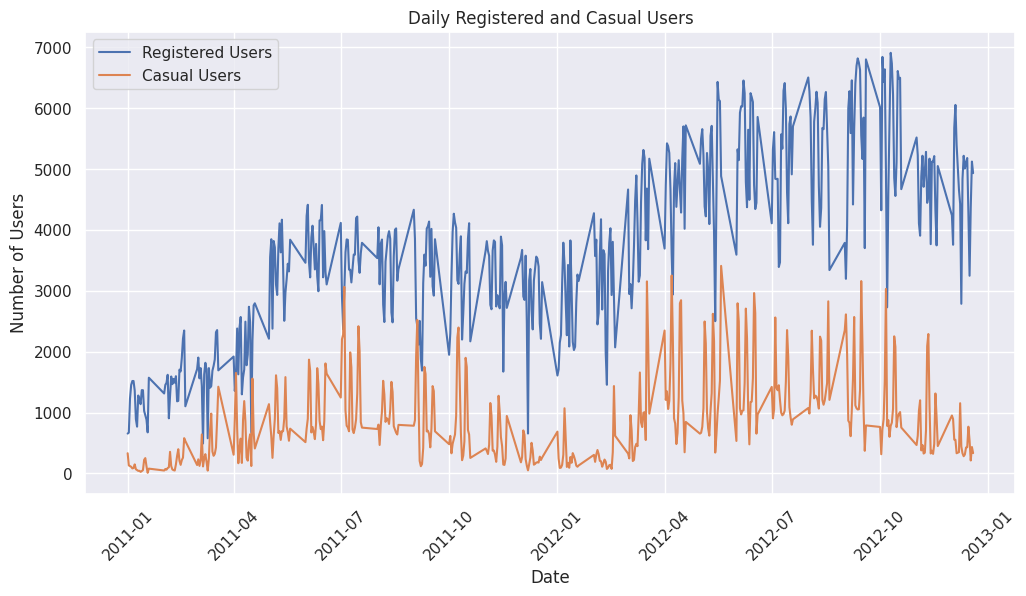

In [36]:
ax = df_viz.plot(x='date', y='registered', label='Registered Users', figsize=(12, 6))
df_viz.plot(x='date', y='casual', label='Casual Users', ax=ax)

# Додавання підписів осей та заголовків
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.title('Daily Registered and Casual Users')
plt.xticks(rotation=45)
plt.legend()

Висновок 12: На візуалізації можемо спостерігати загальну тенденцію по користувачам поступовий ріст з незначним зниженням активності 2011-10 (можливо повязано з некомфортними погодними умовами чи період свят) а далі поступовий ріст. З 2012-10 знову бачимо аналогічну тенденцію як 2011-10, тобто прослідковується сезонність. При цьому кількість зареєстрованих користувачів більша ніж незареєстрованих. З одного боку це добре, адже це говорить про лояльність клієнтів, які скориставшись послугою хочуть продовжити співпрацю. Але потрібно додатково залучати незареєстрованих користувачів, щоб мати потенціал в майбутньому збільшення зареєстрованих користувачів, що означає постійних прибутків. Можливо потрібно прорекламувати наш сервіс додатково.